 Detect a mere 492 fraudulent transactions from 284,807 transactions in total. 

Load a CSV file using Pandas.
Create train, validation, and test sets.
Define and train a model using Keras (including setting class weights).
Evaluate the model using various metrics (including precision and recall).

In [15]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [16]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
    
    pass

In [17]:
!pip install -q imblearn

In [18]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [19]:



raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
raw_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Split the dataframe into train, validation, and test
Split the dataset into train, validation, and test sets. 
The validation set is used during the model fitting to evaluate the loss and any metrics, however the model is not fit with this data. 
The test set is completely unused during the training phase and is only used at the end to evaluate how well the model generalizes to new data. 
This is especially important with imbalanced datasets where overfitting is a significant concern from the lack of training data.

In [21]:
# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(raw_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Class'))
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

# Normalize the input features using the sklearn StandardScaler.
# This will set the mean to 0 and standard deviation to 1.
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (182276,)
Validation labels shape: (45569,)
Test labels shape: (56962,)
Training features shape: (182276, 30)
Validation features shape: (45569, 30)
Test features shape: (56962, 30)


In [22]:
bincount=np.bincount(train_labels)

In [23]:
bincount

array([181948,    328], dtype=int64)

Examine the class label imbalance
Let's look at the dataset imbalance:

In [24]:
neg, pos = np.bincount(train_labels)
print(neg)



181948


In [25]:
print(pos)

328


In [26]:
total = neg + pos
print('{} positive samples out of {} training samples ({:.2f}% of total)'.format(
    pos, total, 100 * pos / total))

328 positive samples out of 182276 training samples (0.18% of total)


Define the model and metrics
Define a function that creates a simple neural network with three densely connected hidden layers, 
an output sigmoid layer that returns the probability of a transaction being fraudulent,

and two dropout layers as an effective way to reduce overfitting.

In [27]:
def make_model():
    model = keras.Sequential([
      keras.layers.Dense(256, activation='relu',
                         input_shape=(train_features.shape[-1],)),
      keras.layers.Dense(256, activation='relu'),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(256, activation='relu'),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(1, activation='sigmoid'),
  ])
    metrics = [
      keras.metrics.Accuracy(name='accuracy'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall')
  ]
    model.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=metrics)
    
    return model




Understanding useful metrics
Notice that there are a few metrics defined above that can be computed by the model that will be helpful when evaluating the performance.

False negatives and false positives are samples that were incorrectly classified
True negatives and true positives are samples that were correctly classified
Accuracy is the percentage of examples correctly classified > 
Precision is the percentage of predicted positives that were correctly classified > 
Recall is the percentage of actual positives that were correctly classified > 
AUC refers to the Area Under the Curve of a Receiver Operating Characteristic curve (ROC-AUC). 
This metric is equal to the probability that a classifier will rank a random positive sample higher than than a random negative sample.

Train a baseline model
Now create and train your model using the function that was defined earlier. Notice that the model is fit using a larger than default batch size of 2048, this is important to ensure that each batch has a decent chance of containing a few positive samples. If the batch size was too small, they would likely have no fraudelent transactions to learn from.

In [28]:
model = make_model()

EPOCHS = 10
BATCH_SIZE = 2048

history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(val_features, val_labels))

Train on 182276 samples, validate on 45569 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
182276/182276 [==============================] - 4s 20us/sample - loss: 0.0472 - accuracy: 0.3993 - tp: 0.0000e+00 - fp: 725.0000 - tn: 181223.0000 - fn: 328.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0257 - val_accuracy: 0.5294 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 45496.0000 - val_fn: 73.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
182276/182276 [==============================] - 3s 17us/sample - loss: 0.0284 - accuracy: 0.3395 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 181948.0000 - fn: 328.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0242 - val_accuracy: 0.1037 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 45496.0000 - val_fn: 73.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
182276/182276 [==============================] - 3s 17us/sample - loss: 0.0108 - accuracy: 0.0394 

Plot metrics on the training and validation sets
In this section, you will produce plots of your model's accuracy and loss on the training and validation set. These are useful to check for overfitting, which you can learn more about in this tutorial.

Additionally, you can produce these plots for any of the metrics you created above. False negatives are included as an example.

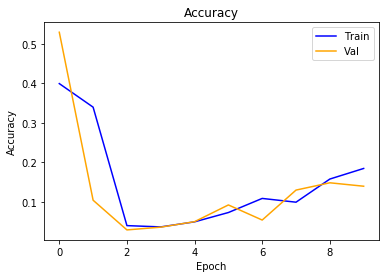

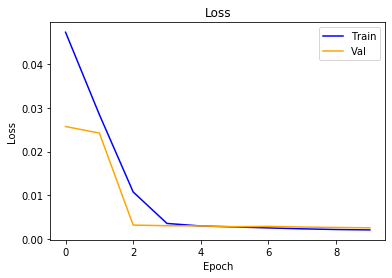

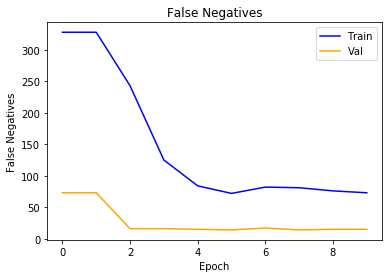

In [29]:
epochs = range(EPOCHS)

plt.title('Accuracy')
plt.plot(epochs,  history.history['accuracy'], color='blue', label='Train')
plt.plot(epochs, history.history['val_accuracy'], color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

_ = plt.figure()
plt.title('Loss')
plt.plot(epochs, history.history['loss'], color='blue', label='Train')
plt.plot(epochs, history.history['val_loss'], color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

_ = plt.figure()
plt.title('False Negatives')
plt.plot(epochs, history.history['fn'], color='blue', label='Train')
plt.plot(epochs, history.history['val_fn'], color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('False Negatives')
plt.legend()

Evaluate the baseline model
Evaluate your model on the test dataset and display results for the metrics you created above.



In [30]:
results = model.evaluate(test_features, test_labels)
for name, value in zip(model.metrics_names, results):
    
    
    print(name, ': ', value)

56962/56962 [==============================] - 3s 59us/sample - loss: 0.0028 - accuracy: 0.1399 - tp: 75.0000 - fp: 7.0000 - tn: 56864.0000 - fn: 16.0000 - precision: 0.9146 - recall: 0.8242
loss :  0.002778963811212757
accuracy :  0.13988273
tp :  75.0
fp :  7.0
tn :  56864.0
fn :  16.0
precision :  0.91463417
recall :  0.82417583


It looks like the precision is relatively high, but the recall and AUC aren't as high as you might like. Classifiers often face challenges when trying to maximize both precision and recall, which is especially true when working with imbalanced datasets. However, because missing fraudulent transactions (false negatives) may have significantly worse business consequences than incorrectly flagging fraudulent transactions (false positives), recall may be more important than precision in this case.

Examine the confusion matrix
You can use a confusion matrix to summarize the actual vs. predictmed labels where the X axis is the predicted label and the Y axis is the actual label.

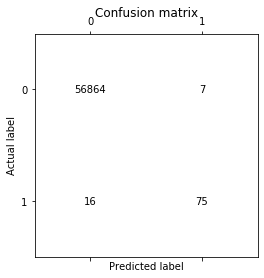

Legitimate Transactions Detected (True Negatives):  56864
Legitimate Transactions Incorrectly Detected (False Positives):  7
Fraudulent Transactions Missed (False Negatives):  16
Fraudulent Transactions Detected (True Positives):  75
Total Fraudulent Transactions:  91


In [31]:
predicted_labels = model.predict(test_features)
cm = confusion_matrix(test_labels, np.round(predicted_labels))

plt.matshow(cm, alpha=0)
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, str(z), ha='center', va='center')
    
plt.show()

print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
print('Total Fraudulent Transactions: ', np.sum(cm[1]))

If the model had predicted everything perfectly, this would be a diagonal matrix where values off the main diagonal, indicating incorrect predictions, would be zero. In this case the matrix shows that you have relatively few false positives, meaning that there were relatively few legitimate transactions that were incorrectly flagged. However, you would likely want to have even fewer false negatives despite the cost of increasing the number of false positives. This trade off may be preferable because false negatives would allow fraudulent transactions to go through, whereas false positives may cause an email to be sent to a customer to ask them to verify their card activity.

Using class weights for the loss function
The goal is to identify fradulent transactions, but you don't have very many of those positive samples to work with, so you would want to have the classifier heavily weight the few examples that are available. You can do this by passing Keras weights for each class through a parameter. These will cause the model to "pay more attention" to examples from an under-represented class.

------

Using class weights for the loss function
The goal is to identify fradulent transactions, but you don't have very many of those positive samples to work with, so you would want to have the classifier heavily weight the few examples that are available. You can do this by passing Keras weights for each class through a parameter. These will cause the model to "pay more attention" to examples from an under-represented class.

In [32]:
weight_for_0 = 1 / neg
weight_for_1 = 1 / pos

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2e}'.format(weight_for_0))
print('Weight for class 1: {:.2e}'.format(weight_for_1))

Weight for class 0: 5.50e-06
Weight for class 1: 3.05e-03


Train a model with class weights
Now try re-training and evaluating the model with class weights to see how that affects the predictions.

Note: Using class_weights changes the range of the loss. This may affect the stability of the training depending on the optimizer. Optimizers who's step size is dependent on the magnitude of the gradient, like optimizers.SGD, may fail. The optimizer used here, optimizers.Adam, is unaffected by the scaling change. Also note that because of the weighting, the total losses are not comparable between the two models.

In [33]:
weighted_model = make_model()

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(val_features, val_labels),
    class_weight=class_weight)

Train on 182276 samples, validate on 45569 samples
Epoch 1/10
182276/182276 [==============================] - 5s 29us/sample - loss: 0.2770 - accuracy: 0.0015 - tp: 285.0000 - fp: 8561.0000 - tn: 173387.0000 - fn: 43.0000 - precision: 0.0322 - recall: 0.8689 - val_loss: 0.0971 - val_accuracy: 0.0019 - val_tp: 67.0000 - val_fp: 894.0000 - val_tn: 44602.0000 - val_fn: 6.0000 - val_precision: 0.0697 - val_recall: 0.9178
Epoch 2/10
182276/182276 [==============================] - 4s 22us/sample - loss: 0.1570 - accuracy: 0.0032 - tp: 300.0000 - fp: 4477.0000 - tn: 177471.0000 - fn: 28.0000 - precision: 0.0628 - recall: 0.9146 - val_loss: 0.0570 - val_accuracy: 0.0039 - val_tp: 66.0000 - val_fp: 444.0000 - val_tn: 45052.0000 - val_fn: 7.0000 - val_precision: 0.1294 - val_recall: 0.9041
Epoch 3/10
182276/182276 [==============================] - 4s 21us/sample - loss: 0.1414 - accuracy: 0.0047 - tp: 299.0000 - fp: 4481.0000 - tn: 177467.0000 - fn: 29.0000 - precision: 0.0626 - recall: 0.911

In [35]:
weighted_results = weighted_model.evaluate(test_features, test_labels)
for name, value in zip(weighted_model.metrics_names, weighted_results):
    print(name, ': ', value)

56962/56962 [==============================] - 3s 45us/sample - loss: 0.0340 - accuracy: 0.1266 - tp: 81.0000 - fp: 707.0000 - tn: 56164.0000 - fn: 10.0000 - precision: 0.1028 - recall: 0.8901
loss :  0.03403136855135392
accuracy :  0.12662828
tp :  81.0
fp :  707.0
tn :  56164.0
fn :  10.0
precision :  0.102791876
recall :  0.8901099


-------

Here you can see that with class weights the accuracy and precision are lower because there are more false positives, but conversely the recall and AUC are higher because the model also found more true positives. Despite having lower overall accuracy, this approach may be better when considering the consequences of failing to identify fraudulent transactions driving the prioritization of recall. Depending on how bad false negatives are, you might use even more exaggerated weights to further improve recall while dropping precision.

Oversampling the minority class
A related approach would be to resample the dataset by oversampling the minority class, which is the process of creating more positive samples using something like sklearn's imbalanced-learn library. This library provides methods to create new positive samples by simply duplicating random existing samples, or by interpolating between them to generate synthetic samples using variations of SMOTE. TensorFlow also provides a way to do Random Oversampling.

In [37]:
# with default args this will oversample the minority class to have an equal
# number of observations
smote = SMOTE()
res_features, res_labels = smote.fit_sample(train_features, train_labels)

res_neg, res_pos = np.bincount(res_labels)
res_total = res_neg + res_pos
print('{} positive samples out of {} training samples ({:.2f}% of total)'.format(
    res_pos, res_total, 100 * res_pos / res_total))

181948 positive samples out of 363896 training samples (50.00% of total)


Train and evaluate a model on the resampled data
Now try training the model with the resampled data set instead of using class weights to see how these methods compare.

In [38]:
resampled_model = make_model()

resampled_history = resampled_model.fit(
    res_features,
    res_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(val_features, val_labels))

Train on 363896 samples, validate on 45569 samples
Epoch 1/10
363896/363896 [==============================] - 9s 24us/sample - loss: 0.0671 - accuracy: 0.3367 - tp: 176658.0000 - fp: 4737.0000 - tn: 177211.0000 - fn: 5290.0000 - precision: 0.9739 - recall: 0.9709 - val_loss: 0.0140 - val_accuracy: 0.4651 - val_tp: 64.0000 - val_fp: 126.0000 - val_tn: 45370.0000 - val_fn: 9.0000 - val_precision: 0.3368 - val_recall: 0.8767
Epoch 2/10
363896/363896 [==============================] - 7s 19us/sample - loss: 0.0072 - accuracy: 0.6617 - tp: 181886.0000 - fp: 411.0000 - tn: 181537.0000 - fn: 62.0000 - precision: 0.9977 - recall: 0.9997 - val_loss: 0.0121 - val_accuracy: 0.7355 - val_tp: 64.0000 - val_fp: 82.0000 - val_tn: 45414.0000 - val_fn: 9.0000 - val_precision: 0.4384 - val_recall: 0.8767
Epoch 3/10
363896/363896 [==============================] - 7s 20us/sample - loss: 0.0037 - accuracy: 0.6600 - tp: 181928.0000 - fp: 196.0000 - tn: 181752.0000 - fn: 20.0000 - precision: 0.9989 - recal

In [39]:
resampled_results = resampled_model.evaluate(test_features, test_labels)
for name, value in zip(resampled_model.metrics_names, resampled_results):
    print(name, ': ', value)

56962/56962 [==============================] - 3s 46us/sample - loss: 0.0073 - accuracy: 0.9692 - tp: 76.0000 - fp: 36.0000 - tn: 56835.0000 - fn: 15.0000 - precision: 0.6786 - recall: 0.8352
loss :  0.007298611600600706
accuracy :  0.9692075
tp :  76.0
fp :  36.0
tn :  56835.0
fn :  15.0
precision :  0.6785714
recall :  0.83516484


This approach can be worth trying, but may not provide better results than using class weights because the synthetic examples may not accurately represent the underlying data.

Applying this tutorial to your problem
Imbalanced data classification is an inherantly difficult task since there are so few samples to learn from. You should always start with the data first and do your best to collect as many samples as possible and give substantial thought to what features may be relevant so the model can get the most out of your minority class. At some point your model may struggle to improve and yield the results you want, so it is important to keep in mind the context of the problem to evaluate how bad your false positives or negatives really are.